## GDAL/OGR

In [1]:
# GDAL and OGR are in the osgeo package
from osgeo import ogr, gdal
# Check GDAL version
print(gdal.VersionInfo('VERSION_NUM'))

2010300


In [2]:
# Create a polygon geometry
ring = ogr.Geometry(ogr.wkbLinearRing)
ring.AddPoint(0.0, 0.0)
ring.AddPoint(0.0,10.0)
ring.AddPoint(10.0,10.0)
ring.AddPoint(10.0,0.0)

poly = ogr.Geometry(ogr.wkbPolygon)
poly.AddGeometry(ring)
print(poly.ExportToWkt())

POLYGON ((0 0 0,0 10 0,10 10 0,10 0 0))


In [3]:
# Iterate over Points in a Polygon
for ring in poly:
    for point in range(0, ring.GetPointCount()):
        # GetPoint returns a tuple not a Geometry
        pt = ring.GetPoint(point)
        print("%i). POINT (%d %d)" %(point, pt[0], pt[1]))

0). POINT (0 0)
1). POINT (0 10)
2). POINT (10 10)
3). POINT (10 0)


In [17]:
# Write a geometry to file
geojson = poly.ExportToJson()
print(geojson)

{ "type": "Polygon", "coordinates": [ [ [ 0.0, 0.0, 0.0 ], [ 0.0, 10.0, 0.0 ], [ 10.0, 10.0, 0.0 ], [ 10.0, 0.0, 0.0 ] ] ] }


## Geospatial Data Formats

In [5]:
# Import geopandas and read in a shapefile
import geopandas as gpd
%matplotlib inline
block_groups = gpd.read_file("./data/census/stpete_cenacs_2015.shp")
block_groups.head(3)

,ABOVE_POV,ABVE_BELW,ACRES,AGE_18_21,AGE_22_29,AGE_30_39,AGE_40_49,AGE_50_64,AGE_5_17,AGE_65_74,...,VACANT,VEHICLE5G,VEHICLE_0,VEHICLE_1,VEHICLE_2,VEHICLE_3,VEHICLE_4,WHITE,WHITE_NH,geometry
0,963,1054,527.425717,38,44,111,247,225,215,69,...,97,0,7,165,209,30,12,1001,942,POLYGON ((-82.60077664328101 27.81145058880528...
1,486,552,60.386076,0,90,147,61,128,15,48,...,0,0,0,159,96,21,0,552,389,POLYGON ((-82.63449862724356 27.81760050916512...
2,1191,1287,149.668086,81,87,98,207,379,177,161,...,44,0,0,292,226,52,0,1231,1154,"POLYGON ((-82.6446266003387 27.80668249858481,..."


In [6]:
# Check the feature types in the geodataframe
block_groups.dtypes

ABOVE_POV       int64
ABVE_BELW       int64
ACRES         float64
AGE_18_21       int64
AGE_22_29       int64
AGE_30_39       int64
AGE_40_49       int64
AGE_50_64       int64
AGE_5_17        int64
AGE_65_74       int64
AGE_65_UP       int64
AGE_75_84       int64
AGE_85_UP       int64
AGE_UNDER5      int64
ALAND         float64
AMERI_ES        int64
ASIAN           int64
AVE_FAM_SZ    float64
AVE_HH_SZ     float64
AWATER        float64
B00_09          int64
B10_13          int64
B14_15          int64
B40_49          int64
B50_59          int64
B60_69          int64
B70_79          int64
B80_89          int64
B90_99          int64
BACHELORS       int64
               ...   
S_ENGLISH       int64
S_EUROPE        int64
S_NOTATALL      int64
S_NOTWELL       int64
S_OTHER         int64
S_SPANISH       int64
S_TOTAL         int64
S_VERYWELL      int64
S_WELL          int64
TIGERYEAR      object
TOTALPOP        int64
TRACTCE10      object
TRAN_BIKE       int64
TRAN_CAR        int64
TRAN_HOME 

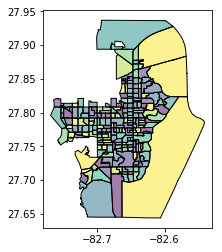

In [18]:
block_groups.plot()

## PySAL

In [8]:
# Read a shapefile with PySAL
import pysal
# pysal.open.check()
shp = pysal.open('./data/census/stpete_cenacs_2015.shp')
len(shp)

231

In [9]:
# Create a weights matrix with rook contiguity from a shapefile
w = pysal.rook_from_shapefile("./data/census/stpete_cenacs_2015.shp")
w.weights[0]
w.neighbors[5]

[1, 2, 3, 6, 10, 14]

In [10]:
# Create a weights matrix with queen contiguity from a shapefile
w = pysal.queen_from_shapefile("./data/census/stpete_cenacs_2015.shp")
w.histogram

[(1, 1),
 (2, 2),
 (3, 10),
 (4, 20),
 (5, 48),
 (6, 57),
 (7, 58),
 (8, 21),
 (9, 8),
 (10, 2),
 (11, 2),
 (12, 0),
 (13, 0),
 (14, 1),
 (15, 0),
 (16, 0),
 (17, 1)]

In [11]:
# Export a W as a .gal file
gal = pysal.open('./data/census/stpete_cenacs_2015.gal','w')
gal.write(w)
gal.close()

In [12]:
# Create a higher order weights matrix from an existing W
# Issues ceating this without reading directly from the .gal
w = pysal.weights.Queen.from_file('./data/census/stpete_cenacs_2015.gal')
w2 = pysal.higher_order(w, 4)
w2.histogram

[(6, 2),
 (7, 4),
 (8, 1),
 (9, 4),
 (10, 3),
 (11, 5),
 (12, 3),
 (13, 5),
 (14, 2),
 (15, 1),
 (16, 5),
 (17, 5),
 (18, 6),
 (19, 3),
 (20, 6),
 (21, 7),
 (22, 7),
 (23, 14),
 (24, 9),
 (25, 10),
 (26, 6),
 (27, 6),
 (28, 10),
 (29, 7),
 (30, 10),
 (31, 7),
 (32, 4),
 (33, 4),
 (34, 10),
 (35, 9),
 (36, 5),
 (37, 8),
 (38, 3),
 (39, 2),
 (40, 2),
 (41, 4),
 (42, 4),
 (43, 7),
 (44, 3),
 (45, 5),
 (46, 3),
 (47, 5),
 (48, 0),
 (49, 2),
 (50, 3)]

In [13]:
# Calculate the spatial lag for Median household income
# Binary weights matrix will produce cumulative weights of neighborhood values
import numpy as np
f = pysal.open("./data/census/stpete_cenacs_2015.dbf")
f.header
y = np.array(f.by_col['MEDHHINC'])
yl = pysal.lag_spatial(w,y)
yl

array([  526135.,   233965.,   275383.,   375029.,   287964.,   423450.,
         263165.,   247640.,   210497.,   270351.,   344603.,   331851.,
         336902.,   300853.,   274127.,   228833.,   289431.,   135777.,
         377851.,   321967.,   413276.,   348732.,   255116.,   337399.,
         255593.,   411820.,   420203.,   399202.,   342894.,   488076.,
         393826.,   228450.,   372177.,   332736.,   232078.,   502282.,
         149555.,   483465.,   185496.,   412462.,   251819.,   305925.,
         322775.,   207482.,  1187391.,   176068.,    46765.,   420611.,
         209844.,   232717.,   163337.,   196814.,   135316.,   368255.,
         170266.,   198499.,   132426.,   208330.,   221998.,   181924.,
         442427.,    96957.,   153638.,   455600.,   573338.,   317967.,
         347957.,   235340.,   404991.,   389061.,   443302.,   393004.,
         118735.,   631616.,   283565.,   264506.,   251256.,   368086.,
         268564.,   283998.,   255837.,   319642., 

In [14]:
# Calculate spatial lag with a row standardized W
# Spatial lag variable represents a weighted average
w.transform = 'r'
yr = pysal.lag_spatial(w,y)
yr

array([  75162.14285714,   46793.        ,   45897.16666667,
         53575.57142857,   57592.8       ,   47050.        ,
         37595.        ,   41273.33333333,   42099.4       ,
         45058.5       ,   49229.        ,   47407.28571429,
         48128.85714286,   50142.16666667,   45687.83333333,
        114416.5       ,   48238.5       ,   45259.        ,
         53978.71428571,   45995.28571429,   51659.5       ,
         49818.85714286,   42519.33333333,   48199.85714286,
         51118.6       ,   68636.66666667,   60029.        ,
         49900.25      ,   68578.8       ,   81346.        ,
         49228.25      ,   45690.        ,   33834.27272727,
         47533.71428571,   33154.        ,   71754.57142857,
         29911.        ,   60433.125     ,   26499.42857143,
         68743.66666667,   25181.9       ,   50987.5       ,
         53795.83333333,   51870.5       ,   69846.52941176,
         44017.        ,   46765.        ,   46734.55555556,
         41968.8       ,

In [15]:
# Calculate Moran's I using a column and weights matrix
w.transform = 'b'
mi = pysal.Moran(y, w, two_tailed=False)
mi.I

0.28135221461193555

In [16]:
# Calculate the pseudo significance for the Moran's I value
np.random.seed(12345)
mir = pysal.Moran(y, w, permutations = 9999)
mir.p_sim

0.0001

In [ ]:
# Calculate LISA for a dataset
lm = pysal.Moran_Local(y,w)
lm.n
len(lm.Is)
lm.p_sim